In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

import os
imgdir = 'output_images'
if not os.path.isdir(imgdir):
    os.mkdir(imgdir)

In [3]:
xlbl = 'bananas bought'
ylbl = 'bananas sold'
NUM_DATA = 10

In [4]:
np.random.seed(0)
x = np.random.randint(20, 50, size=(NUM_DATA, 1))
y = x + np.random.randint(-3, 3, size=(NUM_DATA, 1)) - x **2 / 150 - (x > 40) * 10 - (x < 30) * 10

In [5]:
np.corrcoef(x.flatten(), y.flatten())

array([[1.        , 0.81790002],
       [0.81790002, 1.        ]])

In [6]:
def plot_data():
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize=(15, 8))
    plt.scatter(x, y, label='real sales')
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title('store banana sales vs received')

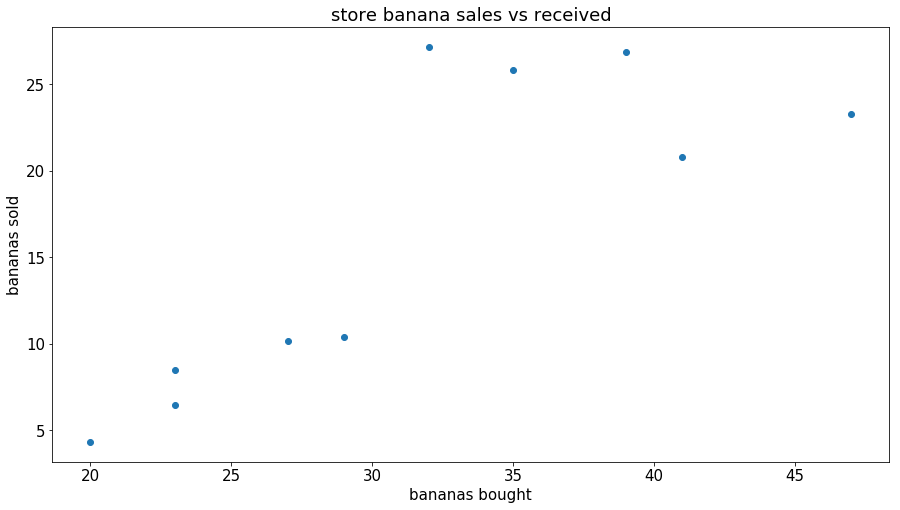

In [7]:
plot_data()
plt.savefig(os.path.join(imgdir, 'raw_data.jpg'))

In [8]:
lr = Ridge().fit(x, y)

In [9]:
lr.coef_, lr.intercept_

(array([[0.85137712]]), array([-10.52885035]))

In [10]:
vizx = np.expand_dims(np.linspace(x.min()-2, x.max() + 2, 1000), -1)

In [11]:
lry = lr.predict(vizx)

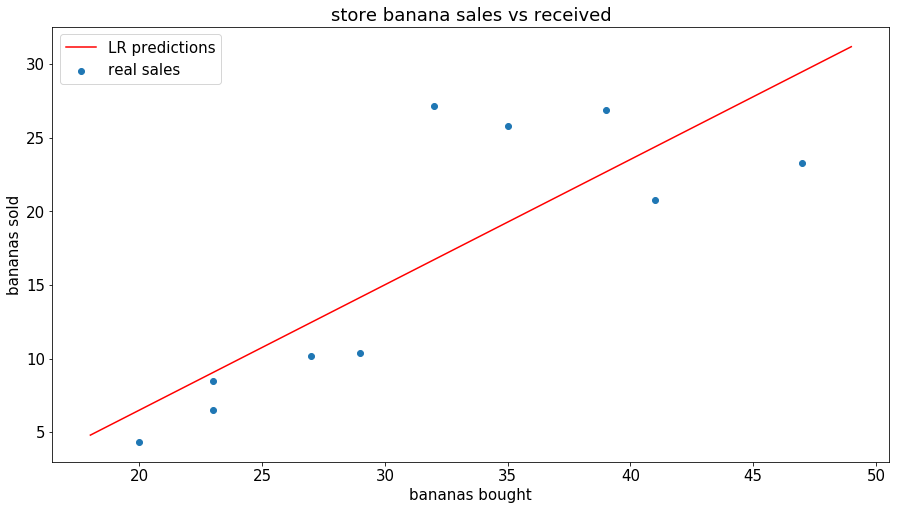

In [12]:
plot_data()
plt.plot(vizx, lry, c='red', label='LR predictions')
plt.legend()
plt.savefig(os.path.join(imgdir, 'linear_regression.jpg'))

In [13]:
feat8 = PolynomialFeatures(8).fit_transform(x)
mean, std = feat8.mean(0), feat8.std(0) + 1
feat8 = (feat8 - mean)/std

vizx8 = PolynomialFeatures(8).fit_transform(vizx)
vizx8 = (vizx8 - mean)/std

lr8 = Ridge(0).fit(feat8, y)
lr8y = lr8.predict(vizx8)

In [14]:
lr8.coef_[:,1:].shape

(1, 8)

In [15]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (lr8.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(lr8.intercept_[0].round())

'The model learned y = x^1 * -178410560.69 + x^2 * 40995572492.44 + x^3 * -4980321973942.21 + x^4 * 366554508424328.2 + x^5 * -1.7329856515010806e+16 + x^6 * 5.1832020263029146e+17 + x^7 * -8.966280783536896e+18 + x^8 * 6.851100949731862e+19 + 16.0'

In [16]:
lr8.coef_, lr8.intercept_

(array([[ 0.00000000e+00, -5.64590382e+06,  3.83566359e+07,
         -1.29658068e+08,  2.52335257e+08, -3.02739577e+08,
          2.22432241e+08, -9.21407190e+07,  1.65228085e+07]]),
 array([16.37466669]))

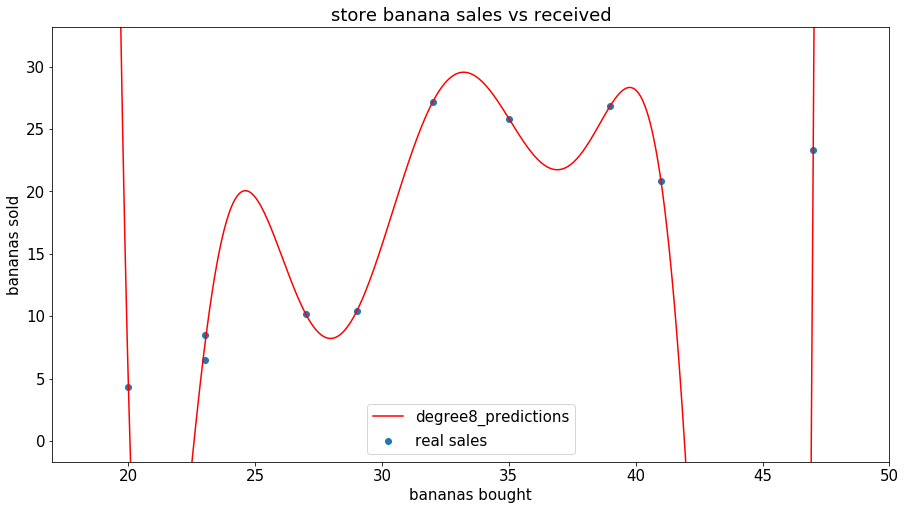

In [17]:
buffer = 3
plot_data()
plt.plot(vizx, lr8y, c='red', label='degree8_predictions')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'degree8_predictions.jpg'))

In [18]:
lr8.coef_

array([[ 0.00000000e+00, -5.64590382e+06,  3.83566359e+07,
        -1.29658068e+08,  2.52335257e+08, -3.02739577e+08,
         2.22432241e+08, -9.21407190e+07,  1.65228085e+07]])

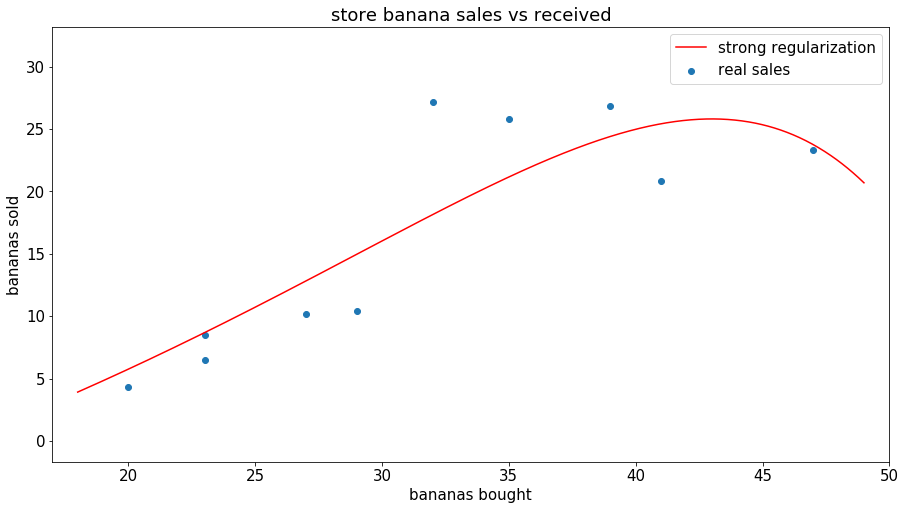

In [19]:

regs = Ridge(1).fit(feat8, y)
ystrong = regs.predict(vizx8)

plot_data()
plt.plot(vizx, ystrong, c='red', label='strong regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'strongreg_predictions.jpg'))

In [20]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (regs.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(regs.intercept_[0].round())

'The model learned y = x^1 * 163.6 + x^2 * 4370.87 + x^3 * 92734.74 + x^4 * 1307224.97 + x^5 * -20471554.03 + x^6 * -3102777029.02 + x^7 * -198392839690.01 + x^8 * -10444493671057.14 + 16.0'

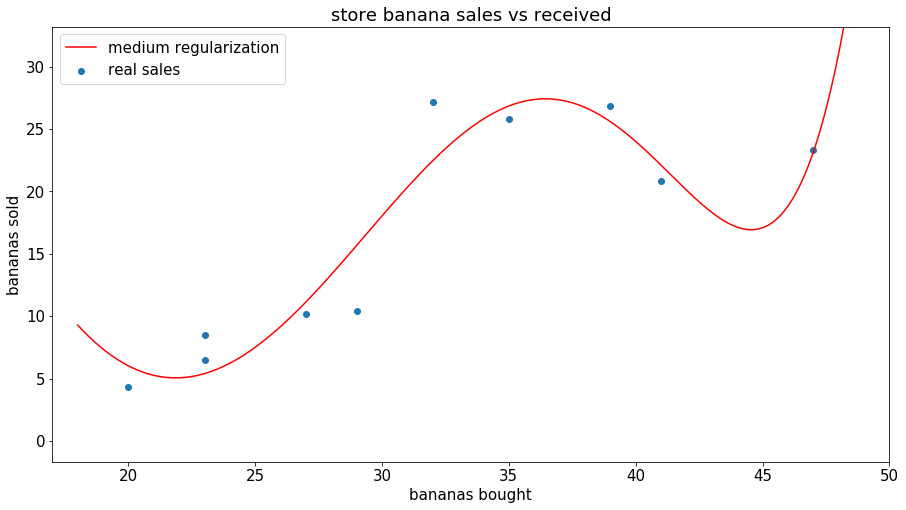

In [21]:

regm = Ridge(1e-5).fit(feat8, y)
ymed = regm.predict(vizx8)

plot_data()
plt.plot(vizx, ymed, c='red', label='medium regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'medium_reg_predictions.jpg'))

In [22]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (regm.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(regm.intercept_[0].round())

'The model learned y = x^1 * -1566.15 + x^2 * -93967.23 + x^3 * 8166658.02 + x^4 * 315272903.31 + x^5 * -3906750382.64 + x^6 * -782741024619.71 + x^7 * -25155033248094.24 + x^8 * 1540247134805556.2 + 16.0'

/home/lee/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2936843302323667e-22 / 1.1102230246251565e-16
  RuntimeWarning)


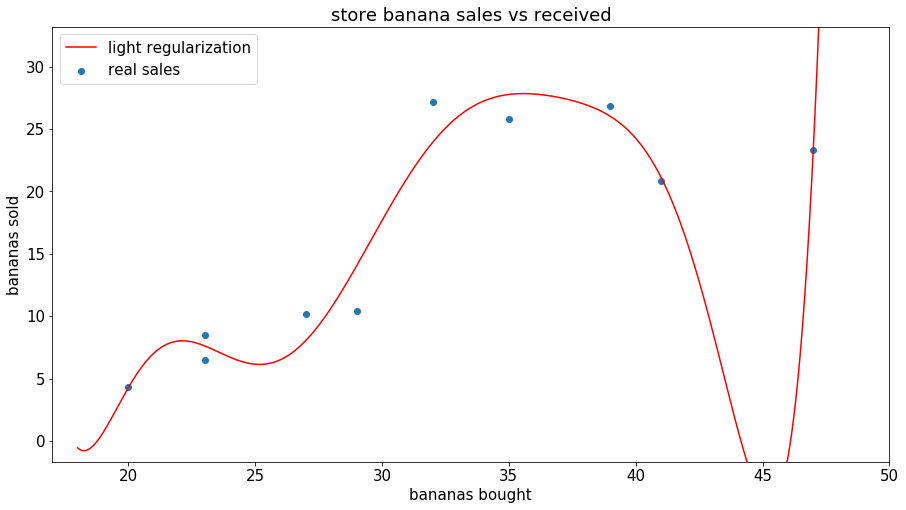

In [23]:

regl = Ridge(1e-20).fit(feat8, y)
ylight = regl.predict(vizx8)

plot_data()
plt.plot(vizx, ylight, c='red', label='light regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'lightreg_predictions.jpg'))

In [24]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (regl.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(regl.intercept_[0].round())

'The model learned y = x^1 * -9930051.22 + x^2 * 2424895097.43 + x^3 * -311179578493.75 + x^4 * 24055317929163.62 + x^5 * -1188260968016701.5 + x^6 * 3.696020355560223e+16 + x^7 * -6.622287162899261e+17 + x^8 * 5.222869630933433e+18 + 16.0'

In [25]:
def plot_data(figsize=(10,4)):
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=figsize)
    plt.scatter(x, y, label='real sales')
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title('store banana sales vs received')

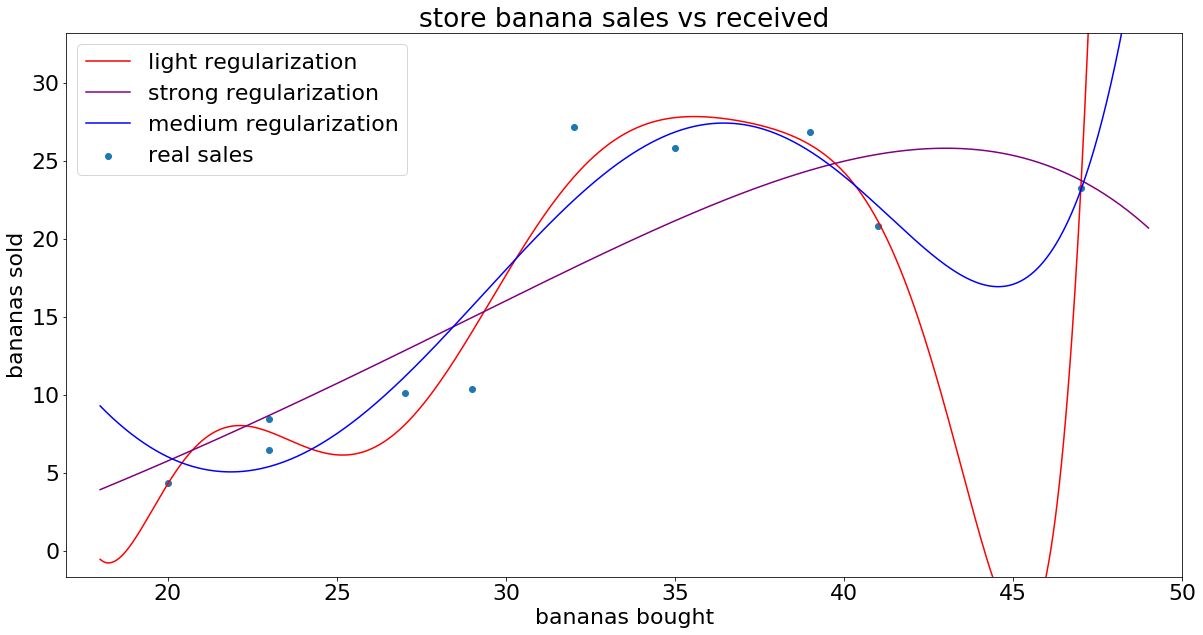

In [26]:

plot_data(figsize=(20,10))
plt.plot(vizx, ylight, c='red', label='light regularization')
plt.plot(vizx, ystrong, c='purple', label='strong regularization')
plt.plot(vizx, ymed, c='blue', label='medium regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'allreg.jpg'))